In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Read Data

In [2]:
pisa = pd.read_csv("pisa.csv", names = ["Lesekompetenz", "Mathematische Grundbildung", "Naturwissenschaftliche Grundbildung"])

In [3]:
pisa.head(5)

,Lesekompetenz,Mathematische Grundbildung,Naturwissenschaftliche Grundbildung
0,528,533,528
1,507,520,496
2,396,334,375
3,497,514,481
4,484,490,487


# EDA

In [4]:
pisa.describe()

,Lesekompetenz,Mathematische Grundbildung,Naturwissenschaftliche Grundbildung
count,31.000000,31.000000,31.000000
mean,493.451613,493.161290,492.612903
std,33.307495,46.828123,37.669331
min,396.000000,334.000000,375.000000
25%,479.500000,473.000000,477.000000
50%,497.000000,503.000000,496.000000
75%,519.000000,524.500000,516.000000
max,546.000000,557.000000,552.000000


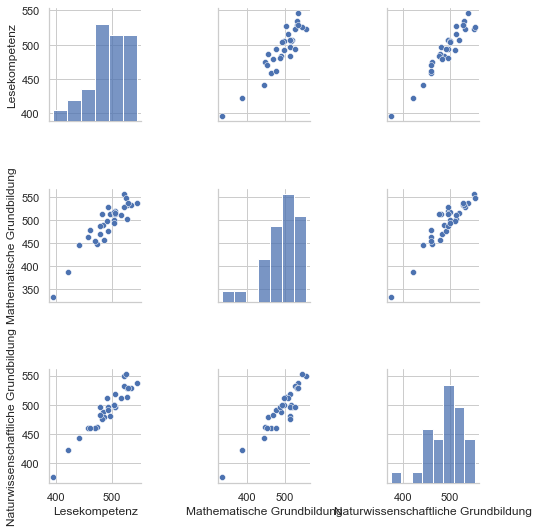

In [5]:
sns.pairplot(data=pisa)

# PCA

In [6]:
# Get Covariance Matrix
pisa.cov()

,Lesekompetenz,Mathematische Grundbildung,Naturwissenschaftliche Grundbildung
Lesekompetenz,1109.389247,1428.324731,1195.613978
Mathematische Grundbildung,1428.324731,2192.873118,1644.031183
Naturwissenschaftliche Grundbildung,1195.613978,1644.031183,1418.978495


In [7]:
# Get Correlation Matrix
corr = pisa.corr()
corr

,Lesekompetenz,Mathematische Grundbildung,Naturwissenschaftliche Grundbildung
Lesekompetenz,1.000000,0.915753,0.952930
Mathematische Grundbildung,0.915753,1.000000,0.931999
Naturwissenschaftliche Grundbildung,0.952930,0.931999,1.000000


In [8]:
from sklearn.decomposition import PCA
# Define Hyperparams
N_COMPONENTS_PCA = 2

pca = PCA(n_components=N_COMPONENTS_PCA)
pisa_transformed = pca.fit_transform(pisa)

In [9]:
sum(pca.explained_variance_ratio_)

0.9877842902739055

In [10]:
pisa_transformed = pd.DataFrame(pisa_transformed, columns = [f"PC{i+1}" for i in range(0, N_COMPONENTS_PCA)])
pisa_transformed.head(5)

,PC1,PC2
0,-63.269938,-4.990971
1,-26.727833,10.862284
2,220.253541,-11.922061
3,-9.587884,18.443361
4,9.780874,5.163073


In [11]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters=5)
clustering.fit_transform(pisa_transformed)
pisa_transformed["cluster"] = clustering.labels_

In [12]:
print(pisa_transformed.shape)
pisa_transformed.head(5)

(31, 3)


,PC1,PC2,cluster
0,-63.269938,-4.990971,2
1,-26.727833,10.862284,0
2,220.253541,-11.922061,1
3,-9.587884,18.443361,0
4,9.780874,5.163073,4


In [13]:
print(pca.explained_variance_)
pca.components_

[4513.53368412  150.0338682 ]


array([[-0.47993961, -0.68430926, -0.54897979],
       [-0.52383499,  0.72549442, -0.44637961]])

In [14]:
#pca.components_[0, :] @ pisa.iloc[0, :]
v = np.array(pca.components_[0, :])
X = np.array(pisa.iloc[0, :])
print(f"v = {v}")
print(f"X = {X}")
print(f"v.T @ X = {v.dot(X)}")

print(f"v^2 = {v.dot(v)}")

v = [-0.47993961 -0.68430926 -0.54897979]
X = [528 533 528]
v.T @ X = -908.006277841378
v^2 = 1.0000000000000002


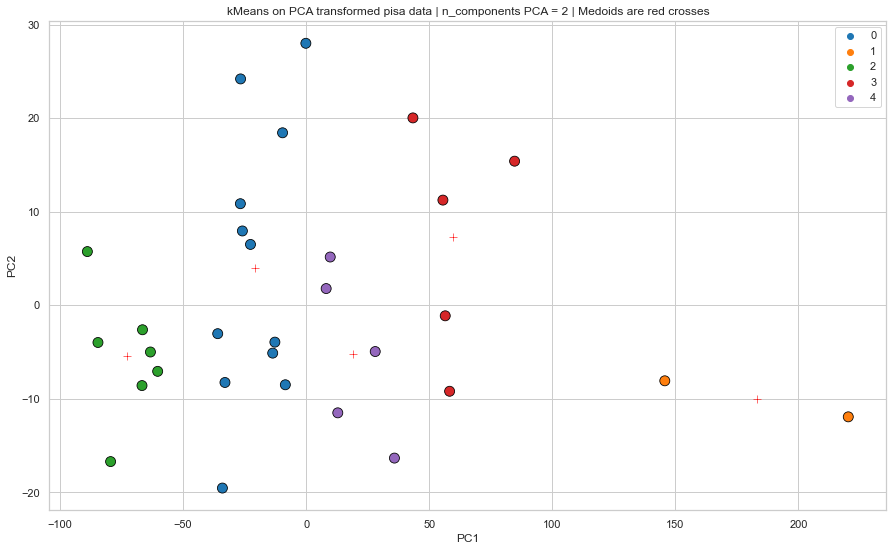

In [24]:
plt.figure(figsize=(15, 9))
plt.title(f"kMeans on PCA transformed pisa data | n_components PCA = {N_COMPONENTS_PCA} | Medoids are red crosses")
sns.scatterplot(data=pisa_transformed,
                x="PC1",
                y="PC2",
                hue="cluster",
                palette="tab10",
                s=100,
                edgecolor="black")
sns.scatterplot(x=clustering.cluster_centers_[:, 0],
                y=clustering.cluster_centers_[:, 1],
                s=50,
                marker="+",
                color="red")
plt.show()